In [1]:
import pextractor as pex
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import illustris_python as il
import seaborn as sns
from matplotlib.gridspec import GridSpec

In [2]:
basePath = '/home/tnguser/sims.TNG/TNG100-1/output'
fields = ['Group_R_Crit200', 'GroupSFR', 'GroupMassType', 'GroupPos', 'GroupFirstSub']
halos = il.groupcat.loadHalos(basePath, 99, fields=fields)

In [3]:
fields = ['SubhaloMass','SubhaloSFRinRad','SubhaloSFR' ,
          'SubhaloStellarPhotometrics', 'SubhaloMassType', 
          'SubhaloGrNr', 'SubhaloPos']
subhalos = il.groupcat.loadSubhalos(basePath, 99, fields=fields)

In [4]:
h = 0.6774

In [5]:
df_groups = pd.read_pickle('../generate_catalog/group_number_cat.pkl')

In [6]:
df_sats_05 = pd.read_pickle('../generate_catalog/satellites_cat/sample_at_05.pkl')
df_sats_1 = pd.read_pickle('../generate_catalog/satellites_cat/sample_at_1.pkl')

In [7]:
extractor = pex.GalaxyGroupExtractor(df_groups, subhalos, halos, h, fields)
extractor.prepare_data()

FS05_rnorm, FS05_qf = extractor.extract_group_data(
    group_column='05FossilR200',
    properties=['SubhaloSFR']
)

NFS05_rnorm, NFS05_qf = extractor.extract_group_data(
    group_column='05NFossilR200',
    properties=['SubhaloSFR']
)


FS1_rnorm, FS1_qf = extractor.extract_group_data(
    group_column='1FossilR200',
    properties=['SubhaloSFR']
)

NFS1_rnorm, NFS1_qf = extractor.extract_group_data(
    group_column='1NFossilR200',
    properties=['SubhaloSFR']
)

/home/tnguser/taller/utilthings/star_formation/pextractor.py:36: RuntimeWarning: divide by zero encountered in log10
  smass = np.log10(self.subhalos['SubhaloMassType'][:, 4] / self.h) + 10


In [8]:
FS05_rnorm[17][3]

{'subhalo_id': 128396,
 'rnorm': 0.6853297704842378,
 'state': 'FS',
 'SubhaloSFR': 0.0}

In [9]:
test_dic = il.groupcat.loadSingle(basePath, 99, subhaloID=128396)

In [10]:
test_dic['SubhaloSFR']

0.0

In [11]:
QF_05_list = list(FS05_qf.values())

In [12]:
QF_NF05_list = list(NFS05_qf.values())

In [13]:
medianQF = np.median(QF_05_list)
mediannQF = np.median(QF_NF05_list)
meanQF = np.mean(QF_05_list)
meannQF = np.mean(QF_NF05_list)

In [14]:
QF_1_list = list(FS1_qf.values())

In [15]:
QF_NF1_list = list(NFS1_qf.values())

In [16]:
medianQF = np.median(QF_1_list)
mediannQF = np.median(QF_NF1_list)
meanQF = np.mean(QF_1_list)
meannQF = np.mean(QF_NF1_list)

In [17]:
weight_fossil = np.ones_like(QF_05_list)/len(df_groups['05FossilR200'])
weight_nonfossil = np.ones_like(QF_NF05_list)/len(df_groups['05NFossilR200'])
#bins= np.arange(0, 1, 0.025)
bins= int(1 + np.log2(len(df_groups['05FossilR200'])+len(df_groups['05NFossilR200'])))

In [18]:
weight_fossil_1 = np.ones_like(QF_1_list)/len(df_groups['1FossilR200'])
weight_nonfossil_1 = np.ones_like(QF_NF1_list)/len(df_groups['1NFossilR200'])
#bins= np.arange(0, 1, 0.025)
bins_1 = int(1 + np.log2(len(df_groups['1FossilR200'])+len(df_groups['1NFossilR200'])))

Text(0.5, 0.01, 'quenching fraction (% of quenched galaxies per halo)')

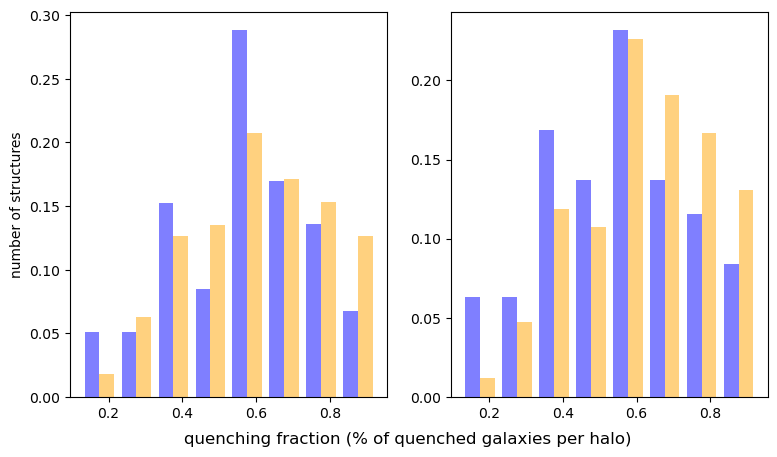

In [19]:
fig, ax = plt.subplots(1,2, figsize=(9,5))

ax[0].hist([QF_NF05_list,QF_05_list], bins=bins, color = ['blue', 'orange'], 
           rwidth=0.8, alpha=0.5, label=['Non fossil', 'Fossil'], 
           weights = [weight_nonfossil, weight_fossil], cumulative=False)
ax[1].hist([QF_NF1_list,QF_1_list], bins=bins, color = ['blue', 'orange'], 
           rwidth=0.8, alpha=0.5, label=['Non fossil', 'Fossil'], 
           weights = [weight_nonfossil_1, weight_fossil_1], cumulative=False)

ax[0].set_ylabel('number of structures')
fig.supxlabel('quenching fraction (% of quenched galaxies per halo)')


In [20]:
df_05 = pd.DataFrame({
    'QF': QF_NF05_list + QF_05_list,
    'state': ['non fosil'] * len(QF_NF05_list) + ['fosil'] * len(QF_05_list)
})

df_1 = pd.DataFrame({
    'QF': QF_NF1_list + QF_1_list,
    'state': ['non fosil'] * len(QF_NF1_list) + ['fosil'] * len(QF_1_list)
})

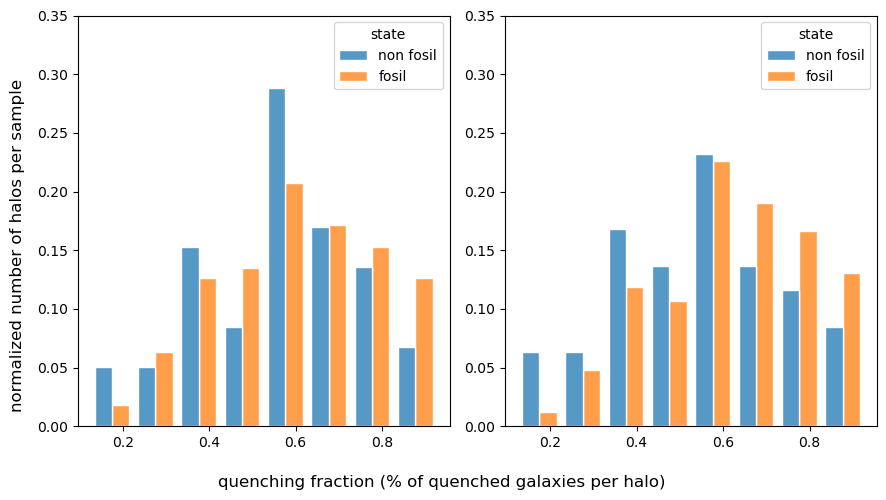

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(9, 5))

sns.histplot(data=df_05, x='QF', hue='state', 
             bins=bins, stat='proportion', element='bars', 
             common_norm=False, ax=ax[0], multiple='dodge', 
             shrink=0.8, edgecolor='white')

sns.histplot(data=df_1, x='QF', hue='state',
             bins=bins, stat='proportion', element='bars',
             common_norm=False, ax=ax[1], multiple='dodge', 
             shrink=0.8, edgecolor='white')

# Quitar etiquetas de ejes individuales
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_ylim(0,0.35)

ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_ylim(0,0.35)
# Etiqueta común en el eje x
fig.supylabel('normalized number of halos per sample')
fig.supxlabel('quenching fraction (% of quenched galaxies per halo)')

plt.tight_layout()
plt.show()


## cumulative quenching fraction

In [22]:
binsnf = np.linspace(0, 1, num=len(QF_NF05_list))
binsf = np.linspace(0, 1, num=len(QF_05_list))

binsnf1 = np.linspace(0, 1, num=len(QF_NF1_list))
binsf1 = np.linspace(0, 1, num=len(QF_1_list))

In [23]:
bins= np.linspace(0, 1, num=50)

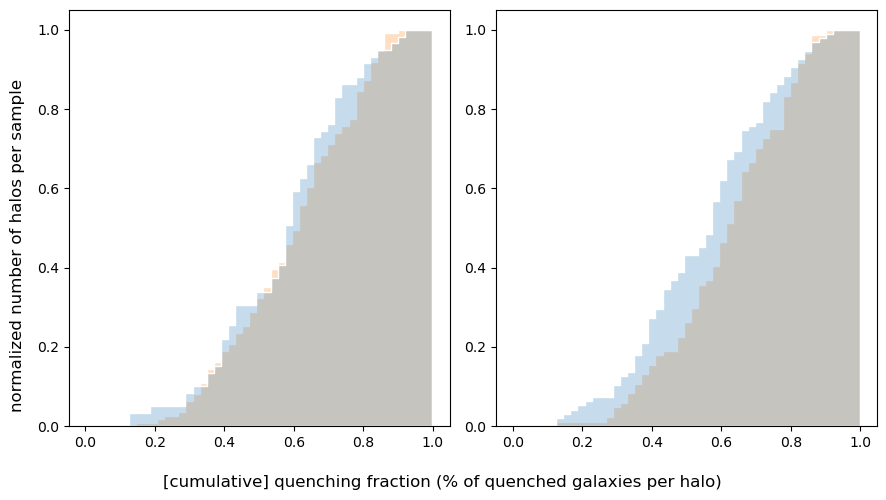

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(9, 5))

sns.histplot(data=df_05, x='QF', hue='state', 
             bins=bins, stat='proportion', element='step', 
             common_norm=False, ax=ax[0], multiple='layer', 
             shrink=0.8, edgecolor='white', cumulative=True, legend='')

sns.histplot(data=df_1, x='QF', hue='state',
             bins=bins, stat='proportion', element='step',
             common_norm=False, ax=ax[1], multiple='layer', 
             shrink=0.8, edgecolor='white', cumulative=True, legend='')

# Quitar etiquetas de ejes individuales
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_ylim(0,1.05)

ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_ylim(0,1.05)
# Etiqueta común en el eje x
fig.supylabel('normalized number of halos per sample')
fig.supxlabel('[cumulative] quenching fraction (% of quenched galaxies per halo)')

plt.tight_layout()
plt.show()

In [25]:
# Funcion para calcular histograma y diferencia
def compute_hist_and_diff(df, bins):
    fosil = df[df['state'] == 'fosil']['QF']
    nofosil = df[df['state'] == 'non fosil']['QF']
    
    h_fosil, _ = np.histogram(fosil, bins=bins, density=True)
    h_nofosil, _ = np.histogram(nofosil, bins=bins, density=True)
    
    return fosil, nofosil, h_fosil, h_nofosil, h_fosil - h_nofosil

/tmp/ipykernel_10967/2998311473.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


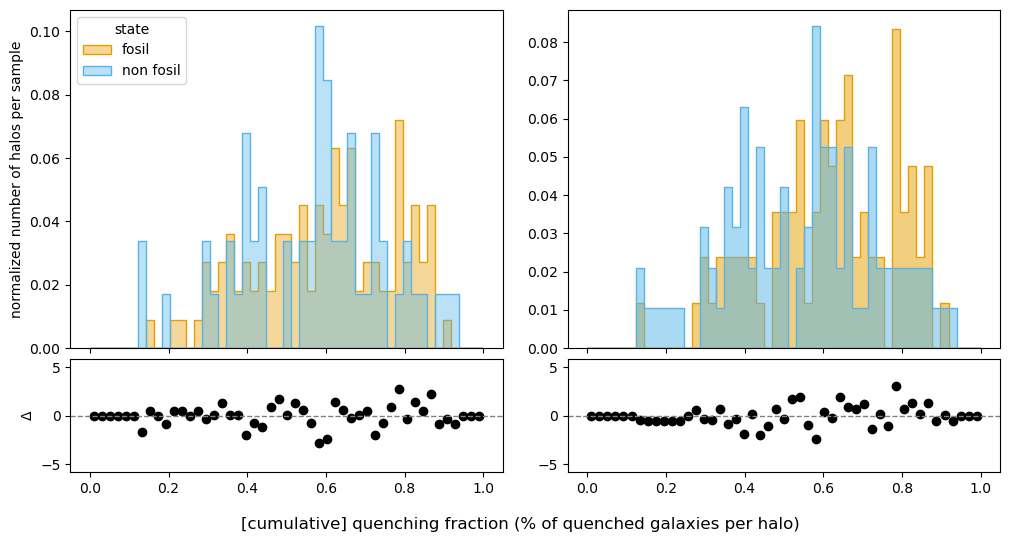

In [26]:
palette = {'fosil': '#E69F00', 'non fosil': '#56B4E9'}

# Bins comunes para ambas comparaciones
bins = np.linspace(0, 1, 50)
bin_centers = 0.5 * (bins[1:] + bins[:-1])


# Calcular para ambas muestras
f05, nf05, h_f05, h_nf05, diff_05 = compute_hist_and_diff(df_05, bins)
f1, nf1, h_f1, h_nf1, diff_1 = compute_hist_and_diff(df_1, bins)

# Crear figura con 2 columnas y 2 filas
fig = plt.figure(figsize=(12, 6))
gs = GridSpec(2, 2, height_ratios=[3, 1], hspace=0.05, wspace=0.15)

# Panel 05
ax_05_main = fig.add_subplot(gs[0, 0])
ax_05_diff = fig.add_subplot(gs[1, 0], sharex=ax_05_main)

sns.histplot(f05, bins=bins, stat='proportion', element='step', fill=True,
             color=palette['fosil'], label='fosil', ax=ax_05_main, 
             cumulative=False, alpha=0.4)
sns.histplot(nf05, bins=bins, stat='proportion', element='step', fill=True,
             color=palette['non fosil'], label='non fosil', ax=ax_05_main, 
             cumulative=False, alpha=0.4)

ax_05_diff.axhline(0, color='gray', linestyle='--', linewidth=1)
ax_05_diff.scatter(bin_centers, diff_05, color='black')

# Panel 1
ax_1_main = fig.add_subplot(gs[0, 1])
ax_1_diff = fig.add_subplot(gs[1, 1], sharex=ax_1_main)

sns.histplot(f1, bins=bins, stat='proportion', element='step', fill=True,
             color=palette['fosil'], label='fosil', ax=ax_1_main, 
             cumulative=False, alpha=0.5)
sns.histplot(nf1, bins=bins, stat='proportion', element='step', fill=True,
             color=palette['non fosil'], label='non fosil', ax=ax_1_main, 
             cumulative=False, alpha=0.5)

ax_1_diff.axhline(0, color='gray', linestyle='--', linewidth=1)
ax_1_diff.scatter(bin_centers, diff_1, color='black')

# Etiquetas y leyenda
ax_05_main.set_ylabel('normalized number of halos per sample')
ax_05_diff.set_ylabel('Δ')
fig.supxlabel('[cumulative] quenching fraction (% of quenched galaxies per halo)')


# Limpiar etiquetas X arriba
ax_05_main.set_xlabel('')
ax_1_main.set_xlabel('')
plt.setp(ax_05_main.get_xticklabels(), visible=False)
plt.setp(ax_1_main.get_xticklabels(), visible=False)

ax_1_main.set_ylabel('')
ax_1_diff.set_ylabel('')

ax_05_diff.set_ylim(-5.8, 5.8)
ax_1_diff.set_ylim(-5.8, 5.8)
# Leyenda solo en uno
ax_05_main.legend(title='state', loc='upper left')

plt.tight_layout()
plt.show()

In [27]:
def compute_cdf_and_diff(df, bins):
    fosil = df[df['state'] == 'fosil']['QF']
    nofosil = df[df['state'] == 'non fosil']['QF']
    
    # Histograma normalizado
    h_fosil, _ = np.histogram(fosil, bins=bins, density=True)
    h_nofosil, _ = np.histogram(nofosil, bins=bins, density=True)
    
    # CDF (suma acumulada de las proporciones)
    cdf_fosil = np.cumsum(h_fosil * np.diff(bins))
    cdf_nofosil = np.cumsum(h_nofosil * np.diff(bins))
    
    return fosil, nofosil, cdf_fosil, cdf_nofosil, cdf_fosil - cdf_nofosil

/tmp/ipykernel_10967/1999405373.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


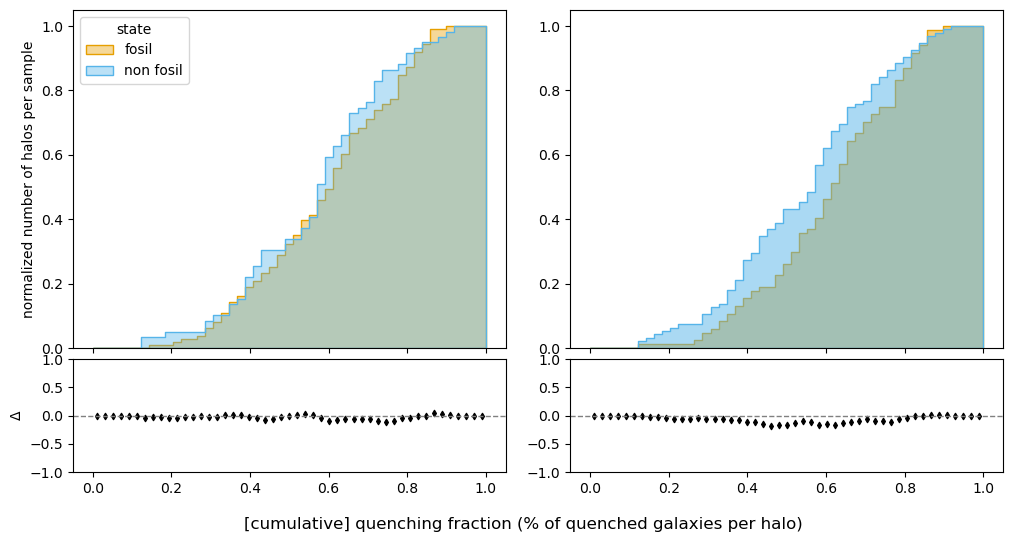

In [28]:
palette = {'fosil': '#E69F00', 'non fosil': '#56B4E9'}

# Bins comunes para ambas comparaciones
bins = np.linspace(0, 1, 50)
bin_centers = 0.5 * (bins[1:] + bins[:-1])


# Calcular para ambas muestras con CDF
f05, nf05, cdf_f05, cdf_nf05, diff_05 = compute_cdf_and_diff(df_05, bins)
f1, nf1, cdf_f1, cdf_nf1, diff_1 = compute_cdf_and_diff(df_1, bins)


# Crear figura con 2 columnas y 2 filas
fig = plt.figure(figsize=(12, 6))
gs = GridSpec(2, 2, height_ratios=[3, 1], hspace=0.05, wspace=0.15)

# Panel 05
ax_05_main = fig.add_subplot(gs[0, 0])
ax_05_diff = fig.add_subplot(gs[1, 0], sharex=ax_05_main)

sns.histplot(f05, bins=bins, stat='proportion', element='step', fill=True,
             color=palette['fosil'], label='fosil', ax=ax_05_main, 
             cumulative=True, alpha=0.4)
sns.histplot(nf05, bins=bins, stat='proportion', element='step', fill=True,
             color=palette['non fosil'], label='non fosil', ax=ax_05_main, 
             cumulative=True, alpha=0.4)

ax_05_diff.axhline(0, color='gray', linestyle='--', linewidth=1)
ax_05_diff.scatter(bin_centers, diff_05, color='black', s=10, marker='d')

# Panel 1
ax_1_main = fig.add_subplot(gs[0, 1])
ax_1_diff = fig.add_subplot(gs[1, 1], sharex=ax_1_main)

sns.histplot(f1, bins=bins, stat='proportion', element='step', fill=True,
             color=palette['fosil'], label='fosil', ax=ax_1_main, 
             cumulative=True, alpha=0.5)
sns.histplot(nf1, bins=bins, stat='proportion', element='step', fill=True,
             color=palette['non fosil'], label='non fosil', ax=ax_1_main, 
             cumulative=True, alpha=0.5)

ax_1_diff.axhline(0, color='gray', linestyle='--', linewidth=1)
ax_1_diff.scatter(bin_centers, diff_1, color='black', s=10, marker='d')


# Etiquetas y leyenda
ax_05_main.set_ylabel('normalized number of halos per sample')
ax_05_diff.set_ylabel('Δ')
fig.supxlabel('[cumulative] quenching fraction (% of quenched galaxies per halo)')


# Limpiar etiquetas X arriba
ax_05_main.set_xlabel('')
ax_1_main.set_xlabel('')
plt.setp(ax_05_main.get_xticklabels(), visible=False)
plt.setp(ax_1_main.get_xticklabels(), visible=False)

ax_1_main.set_ylabel('')
ax_1_diff.set_ylabel('')

ax_05_diff.set_ylim(-1, 1)
ax_1_diff.set_ylim(-1, 1)
# Leyenda solo en uno
ax_05_main.legend(title='state', loc='upper left')


plt.tight_layout()
plt.show()


## ks-tests

In [29]:
from scipy.stats import kstest
from scipy.stats import ks_2samp

In [30]:
print(ks_2samp(QF_05_list, QF_NF05_list))
print(ks_2samp(QF_05_list, QF_NF05_list, alternative='less'))

KstestResult(statistic=0.1226141395632921, pvalue=0.5554718357757391, statistic_location=0.6153846153846154, statistic_sign=-1)
KstestResult(statistic=0.1226141395632921, pvalue=0.28389650819213386, statistic_location=0.6153846153846154, statistic_sign=-1)


In [31]:
print(ks_2samp(QF_1_list, QF_NF1_list))
print(ks_2samp(QF_1_list, QF_NF1_list, alternative='less'))

KstestResult(statistic=0.17794486215538846, pvalue=0.10136376886402496, statistic_location=0.4666666666666667, statistic_sign=-1)
KstestResult(statistic=0.17794486215538846, pvalue=0.05068732779693345, statistic_location=0.4666666666666667, statistic_sign=-1)
